In [2]:
! git clone https://github.com/amn8ge/eda_assignment.git

Cloning into 'eda_assignment'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 21 (delta 0), reused 0 (delta 0), pack-reused 12 (from 1)
Receiving objects: 100% (21/21), 9.76 MiB | 16.31 MiB/s, done.


In [3]:
cd eda_assignment/

/content/eda_assignment


In [4]:
%cd data/

# setting my current directory to the data file that stores all necessary files

/content/eda_assignment/data


In [1]:
ls -al

total 16
drwxr-xr-x 1 root root 4096 Sep  5 13:36 ./
drwxr-xr-x 1 root root 4096 Sep  9 02:00 ../
drwxr-xr-x 4 root root 4096 Sep  5 13:35 .config/
drwxr-xr-x 1 root root 4096 Sep  5 13:36 sample_data/


Q1 - **all pictures of proofs are in the github repo in the "data" folder**



Q2

2.1

In [13]:
import pandas as pd
import numpy as np

airbnb = pd.read_csv('airbnb_hw.csv')

2.2

In [15]:
print(airbnb.columns)
print(airbnb.shape)
airbnb.head()

# the dimensions are 13 columns by 30,478 observations
# the variables are 'Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type', 'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', and 'Review Scores Rating'

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')
(30478, 13)


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


2.3

In [17]:
pd.crosstab(airbnb['Room Type'], airbnb['Property Type'], dropna=False)

# the rooms that are available are most often entire apartments and private rooms; shared rooms are less common.
# boutique options such as boat, bungalow, cabin, camper, etc. have barely any available rooms.
# listings are dominated by traditional airbnb properties.
# private rooms are common at properties that would typically be larger and have many different rooms for rent, such as B&Bs or entire houses.

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa,NaN
Room Type,,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4,2
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4,1
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0,0


2.4

Text(0, 0.5, 'Count')

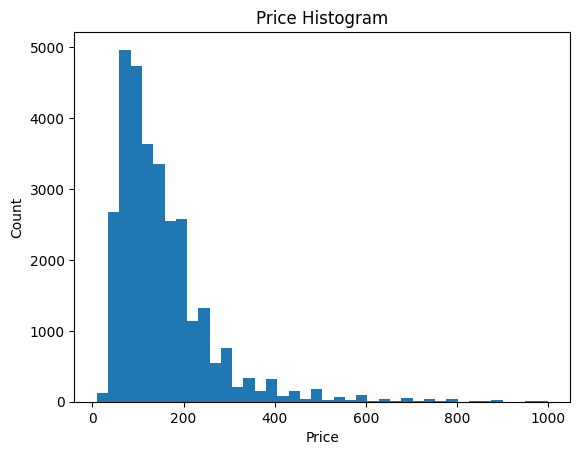

In [32]:
airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors='coerce')
# casting all prices to numeric

airbnb['Price'].hist(bins=40,grid=False)
plt.title('Price Histogram')
plt.xlabel('Price')
plt.ylabel('Count')

Text(0.5, 0, 'Price')

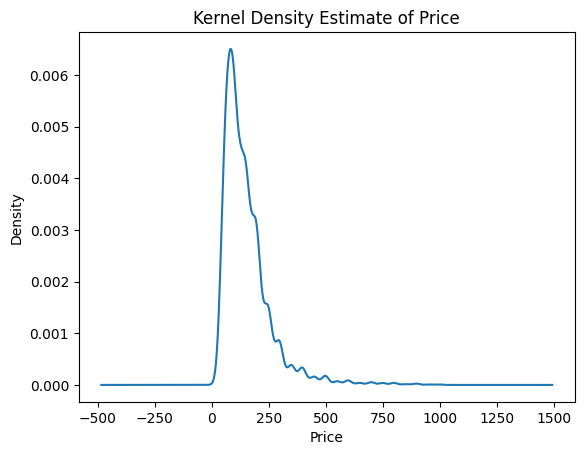

In [33]:
airbnb['Price'].plot(kind='kde')
plt.title('Kernel Density Estimate of Price')
plt.xlabel('Price')

Text(0.5, 0, 'Price')

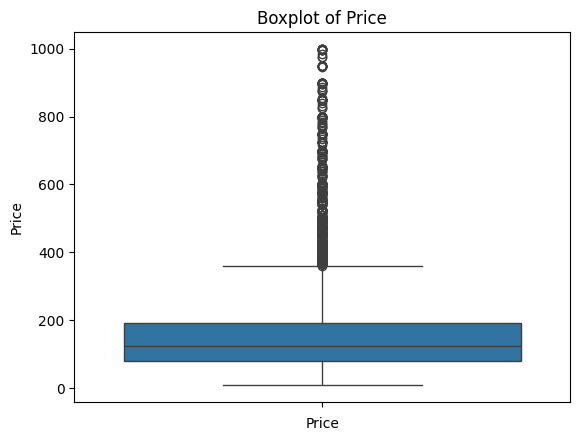

In [36]:
import seaborn as sns

sns.boxplot(airbnb['Price'])
plt.title('Boxplot of Price')
plt.xlabel('Price')

In [37]:
print(airbnb['Price'].describe())

count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64


Text(0, 0.5, 'Count')

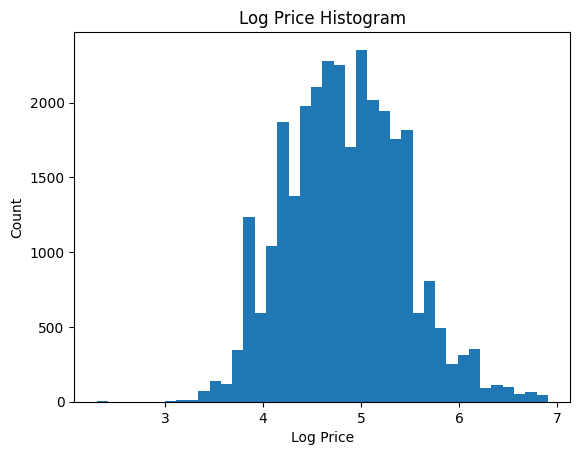

In [39]:
airbnb['price_log'] = np.log(airbnb['Price'])
airbnb['price_log'].hist(bins=40,grid=False)
plt.title('Log Price Histogram')
plt.xlabel('Log Price')
plt.ylabel('Count')
# the data was badly scaled initially, which is demonstrated in the more uniformly shaped histogram post-transformation
# the new histogram has a more compressed range with fewer extreme prices
# the new histogram is also less skewed and more symmetric

2.5

        count        mean         std    min     25%    50%     75%    max
Beds                                                                      
0.0       2.0   92.000000   38.183766   65.0   78.50   92.0  105.50  119.0
1.0   20307.0  124.757670   75.685752   10.0   75.00  100.0  155.00  950.0
2.0    6561.0  186.702332  115.044205   25.0  115.00  160.0  225.00  999.0
3.0    2029.0  234.928043  142.288189   26.0  140.00  200.0  299.00  999.0
4.0     766.0  280.554830  175.512312   27.0  150.00  240.0  363.75  999.0
5.0     274.0  322.000000  190.319415   35.0  186.00  285.0  425.00  995.0
6.0     166.0  316.313253  201.157585   35.0  183.75  271.0  399.00  900.0
7.0      45.0  341.377778  220.116631   55.0  177.00  300.0  445.00  900.0
8.0      20.0  331.850000  155.652202   55.0  218.75  339.5  408.75  750.0
9.0      14.0  587.142857  208.351721  175.0  423.75  625.0  750.00  900.0
10.0     15.0  442.200000  263.926992   95.0  287.00  400.0  650.00  975.0
11.0      4.0  332.250000

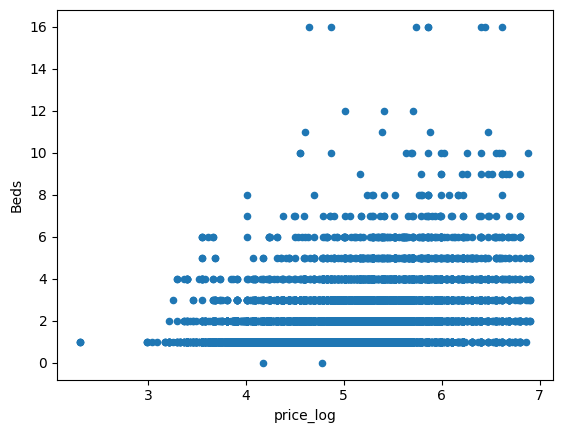

In [46]:
airbnb.plot.scatter(y='Beds',x='price_log')
# I see a density on the bottom end of the spectrum, the 1-3 bed range. There is also a density in the middle of the price range, at around 5.
# It's far less common to have properties with upwards of 6 rooms--that's where the density really decreases.

stats = airbnb.groupby('Beds')['Price'].describe()
print(stats)
# average price rises with the number of bedrooms up through 7 bedrooms, which is to be expected, but it peaks with 9 bedrooms.
# average price decreases after 9 bedrooms, which is interesting but maybe a result of the low sample size/outliers at that number of bedrooms
# there are also larger standard deviations in price as the number of bedrooms rises and, eventually, as the sample size shrinks

2.6

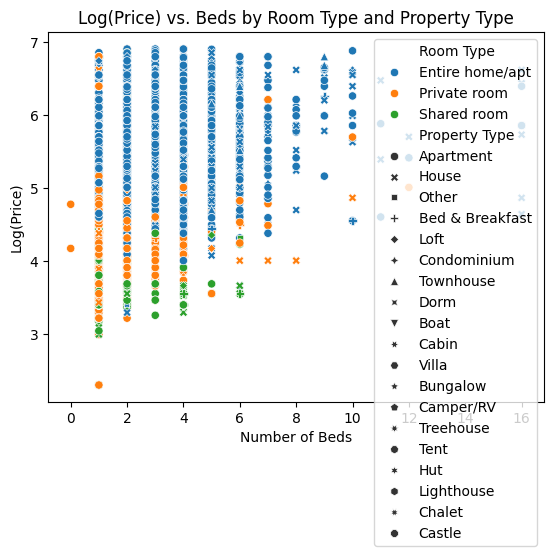

In [50]:
sns.scatterplot(
    data=airbnb,
    x='Beds',
    y='price_log',
    hue='Room Type',
    style='Property Type'
)

plt.title('Log(Price) vs. Beds by Room Type and Property Type')
plt.xlabel('Number of Beds')
plt.ylabel('Log(Price)')
plt.show()

# more expensive rentals are present throughout the number of beds, but less expensive rentals are limited to properties with beds
# under 6; after that, the price is > log 5. It's relatively difficult to read this data because of the number of symbols involved.
# I think a future iteration of this chart would focus on interpretability.

In [62]:
grp_price = airbnb.groupby(['Room Type', 'Property Type'])['price_log'].describe()
print(grp_price)

                                   count      mean       std       min  \
Room Type       Property Type                                            
Entire home/apt Apartment        15550.0  5.189336  0.449590  2.302585   
                Bed & Breakfast     13.0  5.077144  0.516313  4.442651   
                Boat                 7.0  5.022801  0.312121  4.605170   
                Bungalow             4.0  4.972587  0.355222  4.465908   
                Cabin                1.0  5.521461       NaN  5.521461   
                Camper/RV            6.0  4.458062  0.767476  3.806662   
                Condominium         71.0  5.479808  0.548559  4.382027   
                Dorm                 4.0  3.698835  0.466067  3.401197   
                House              723.0  5.265601  0.610416  3.295837   
                Lighthouse           1.0  3.663562       NaN  3.663562   
                Loft               379.0  5.479039  0.573715  4.007333   
                Other               10

In [63]:
avg_pt_price = airbnb.groupby(['Property Type'])['price_log'].mean()
print(avg_pt_price)
print(" ")
avg_rt_price = airbnb.groupby(['Room Type'])['price_log'].mean()
print(avg_rt_price)

# the room type with the highest average price is entire home/apt
# the property type with the highest average price is condominium
# I would argue that the mean is a more accurate of central tendency because we are using the log version of price
# if the outliers were extreme or significant, such as seen in the non-transformed version of price, I might consider using the median
# but given that we have transformed price and are looking at a less skewed, more consistent pile of data, I am comfortable using
# the mean as an estimate of central tendency

Property Type
Apartment          4.862280
Bed & Breakfast    4.511523
Boat               4.993387
Bungalow           4.972587
Cabin              4.951744
Camper/RV          4.344562
Castle             5.010635
Chalet             4.595120
Condominium        5.250846
Dorm               4.216383
House              4.591726
Hut                4.258597
Lighthouse         3.663562
Loft               4.972550
Other              4.992589
Tent               4.598841
Townhouse          4.935406
Treehouse          4.873417
Villa              4.942150
Name: price_log, dtype: float64
 
Room Type
Entire home/apt    5.200087
Private room       4.416068
Shared room        4.169219
Name: price_log, dtype: float64


In [64]:
pt_std = airbnb.groupby(['Property Type'])['price_log'].std()
print(pt_std)
print(" ")
rt_std = airbnb.groupby(['Room Type'])['price_log'].std()
print(rt_std)

# the room type with the highest standard deviation is shared room
# the property type with the highest standard deviation is tent

Property Type
Apartment          0.577303
Bed & Breakfast    0.514914
Boat               0.300706
Bungalow           0.355222
Cabin              0.805702
Camper/RV          0.762250
Castle                  NaN
Chalet                  NaN
Condominium        0.661638
Dorm               0.479466
House              0.699749
Hut                0.490129
Lighthouse              NaN
Loft               0.739112
Other              0.761547
Tent               0.822393
Townhouse          0.681827
Treehouse          0.556869
Villa              0.591337
Name: price_log, dtype: float64
 
Room Type
Entire home/apt    0.465726
Private room       0.406457
Shared room        0.525641
Name: price_log, dtype: float64


3.1

In [66]:
rigs = pd.read_csv('drilling_rigs.csv')
print(rigs.columns)
print(rigs.shape)
rigs.head()

# the dimensions are 10 columns (variables) by 623 observations
# the columns are 'Month',
# 'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
#       'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)',
#       'Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)',
#       'Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
#       'Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)',
#       'Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)',
#       'Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)',
#       'Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
#       'Active Well Service Rig Count (Number of Rigs)'

# these datatypes are objects, not numerics, so will have to be converted into numeric type
# I would run a function that checked if the variable type was "object", and if so use the pandas function pd.to_numeric to convert them
# to numeric types, including a "coerce" errors clause

Index(['Month',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)',
       'Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)',
       'Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
       'Active Well Service Rig Count (Number of Rigs)'],
      dtype='object')
(623, 10)


,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991


3.2

In [67]:
rigs['time'] = pd.to_datetime(rigs['Month'], format='mixed')

3.3

In [75]:
rigs['Active Well Service Rig Count (Number of Rigs)'] = pd.to_numeric(
    rigs['Active Well Service Rig Count (Number of Rigs)'], errors='coerce'
)
# converting to numeric, per earlier comment

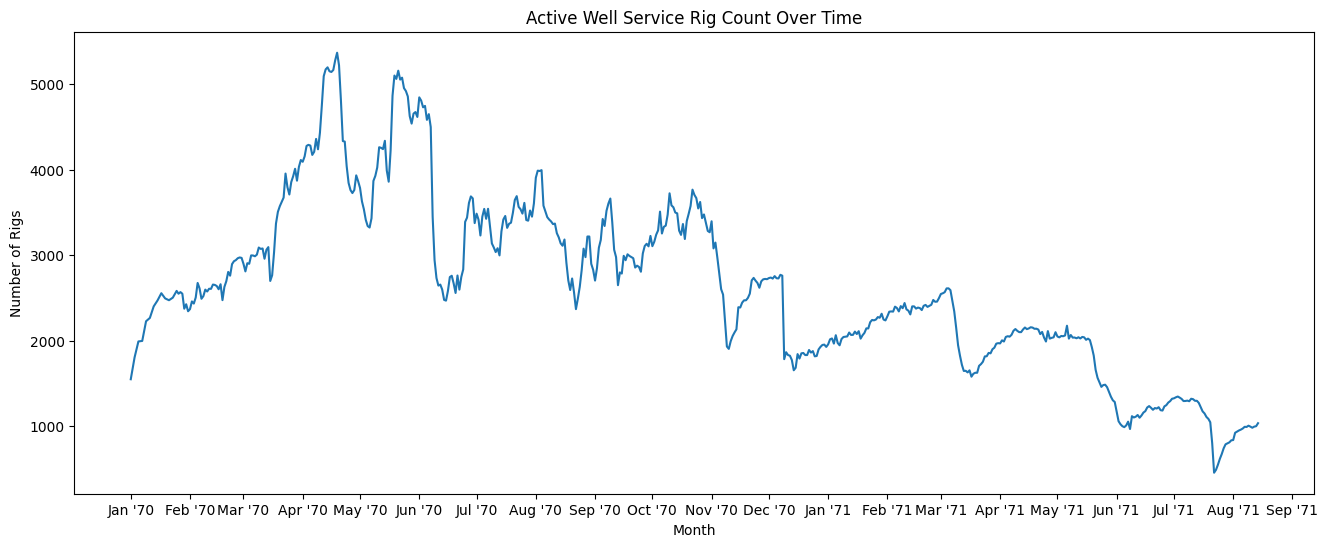

In [87]:
import matplotlib.dates as mdates
plt.figure(figsize=(16, 6))

plt.plot(rigs['Month'], rigs['Active Well Service Rig Count (Number of Rigs)'])

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())             # Show ticks every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b \'%y'))     # Format as month and year
# Here, I used AI assistance to adjust the formatting so that the x-axis labels were easier to read

plt.title('Active Well Service Rig Count Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Rigs')
plt.show()

# In the year and a half between January 1970 and August 1971, the number of active well service rigs decreased slightly.
# There was enormous volatility during that time period, however, with spikes and drops in the number of active rigs,
# most notably in spring and early summer of 1970, when the active rigs peaked. The is a trend of steep, sudden decreases
# in active rigs after periods of steady gain.

3.4

In [88]:
rigs['rig_diff'] = rigs['Active Well Service Rig Count (Number of Rigs)'].diff()

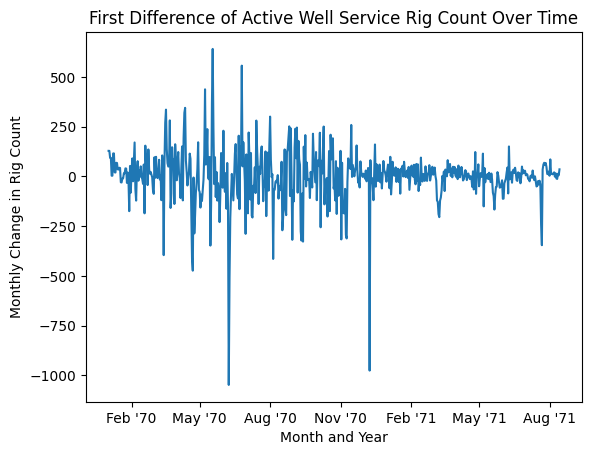

In [95]:
plt.plot(rigs['Month'], rigs['rig_diff'])

# format x-axis as "May '70"
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
# tick every 3 months for readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b '%y"))

plt.title('First Difference of Active Well Service Rig Count Over Time')
plt.xlabel('Month and Year')
plt.ylabel('Monthly Change in Rig Count')
plt.show()

# in this graph, I see the echos of the first one, in that there are huge spikes month to month
# of how many active well service rigs there are. In late spring of 1970, there is a 1000 rig deficit
# month to month, but it was preceded by a month over month increase of 500+ rigs just a few months prior.
# The huge swings level out over time, after January of 1971, and the month over month differences are much smaller.

3.5

<Axes: xlabel='Month', ylabel='Rig Total'>

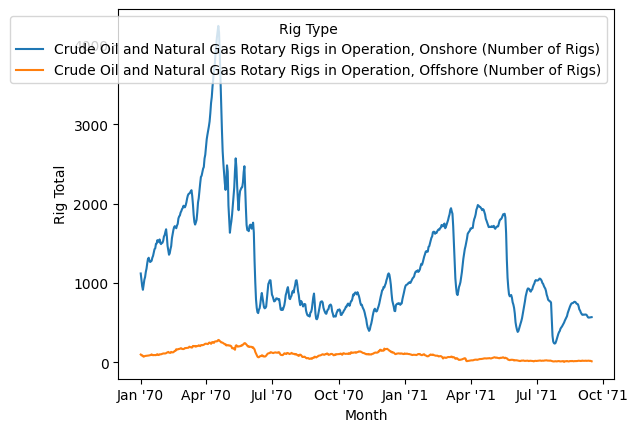

In [106]:
melted_rigs = rigs.melt(
    id_vars='Month',
    value_vars=['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
                'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'],
    var_name='Rig Type',
    value_name='Rig Total'
)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
# setting it so that there are tick marks every three months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b '%y"))
# adjusting date formatting

sns.lineplot(
    data=melted_rigs,
    x='Month',
    y='Rig Total',
    hue='Rig Type'
)

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

**Q3.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.